In [1]:
path= r"D:\Asus\Documents\retail_clean (1).csv"

In [2]:
import pandas as pd

In [15]:
retail= pd.read_csv(path,index_col='Unnamed: 0')

In [16]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [17]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779495 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      779495 non-null  int64  
 1   StockCode    779495 non-null  object 
 2   Description  779495 non-null  object 
 3   Quantity     779495 non-null  int64  
 4   InvoiceDate  779495 non-null  object 
 5   Price        779495 non-null  float64
 6   Customer ID  779495 non-null  float64
 7   Country      779495 non-null  object 
 8   Revenue      779495 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 59.5+ MB


In [18]:
retail.describe().T

,count,mean,std,min,25%,50%,75%,max
Invoice,779495.0,537427.005391,26901.961110,489434.0,514483.00,536754.00,562002.00,581587.0
Quantity,779495.0,13.507085,146.540284,1.0,2.00,6.00,12.00,80995.0
Price,779495.0,3.218199,29.674823,0.0,1.25,1.95,3.75,10953.5
Customer ID,779495.0,15320.262918,1695.722988,12346.0,13971.00,15246.00,16794.00,18287.0
Revenue,779495.0,22.289821,227.416962,0.0,4.95,12.48,19.80,168469.6


In [24]:
retail['Daysof Week']=pd.to_datetime(retail['InvoiceDate']).dt.dayofweek

In [27]:
retail['Daysof Week'].value_counts()

3    156012
1    134028
2    130782
6    130141
0    124957
4    103175
5       400
Name: Daysof Week, dtype: int64

In [28]:
import seaborn as sns

C:\Users\Asus\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Daysof Week', ylabel='count'>

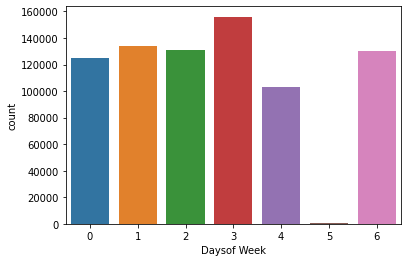

In [29]:
sns.countplot(retail['Daysof Week'])

In [51]:
retail['Inv Date']= pd.to_datetime(retail['InvoiceDate']).dt.strftime('%Y-%M-%D')

In [52]:
grouped_retail=retail.groupby(['Description','Inv Date']).agg(totes_sales=('Quantity','sum')).reset_index()

In [53]:
grouped_retail.columns

Index(['Description', 'Inv Date', 'totes_sales'], dtype='object')

In [54]:
cv_data= grouped_retail.groupby('Description').agg(average=('totes_sales','mean'), sd= ('totes_sales', 'std')).reset_index()

In [55]:
cv_data

,Description,average,sd
0,DOORMAT UNION JACK GUNS AND ROSES,3.274510,2.987162
1,3 STRIPEY MICE FELTCRAFT,6.018182,8.969860
2,4 PURPLE FLOCK DINNER CANDLES,6.352941,9.482243
3,50'S CHRISTMAS GIFT BAG LARGE,17.453704,37.975492
4,ANIMAL STICKERS,32.083333,11.758620
...,...,...,...
5278,ZINC T-LIGHT HOLDER STARS SMALL,20.914530,30.657200
5279,ZINC TOP 2 DOOR WOODEN SHELF,5.041667,4.570760
5280,ZINC WILLIE WINKIE CANDLE STICK,14.077626,16.141916
5281,ZINC WIRE KITCHEN ORGANISER,2.083333,1.311372


In [56]:
grouped_retail

,Description,Inv Date,totes_sales
0,DOORMAT UNION JACK GUNS AND ROSES,2010-01-01/25/10,1
1,DOORMAT UNION JACK GUNS AND ROSES,2010-03-01/14/10,1
2,DOORMAT UNION JACK GUNS AND ROSES,2010-03-01/24/10,3
3,DOORMAT UNION JACK GUNS AND ROSES,2010-05-01/21/10,10
4,DOORMAT UNION JACK GUNS AND ROSES,2010-06-01/29/10,6
...,...,...,...
757243,ZINC WIRE SWEETHEART LETTER TRAY,2011-50-09/04/11,2
757244,ZINC WIRE SWEETHEART LETTER TRAY,2011-51-06/02/11,7
757245,ZINC WIRE SWEETHEART LETTER TRAY,2011-53-04/21/11,1
757246,ZINC WIRE SWEETHEART LETTER TRAY,2011-53-11/23/11,2


In [57]:
cv_data['coeff_var_sq']= (cv_data['sd']/cv_data['average'])**2

In [58]:
cv_data

,Description,average,sd,coeff_var_sq
0,DOORMAT UNION JACK GUNS AND ROSES,3.274510,2.987162,0.832195
1,3 STRIPEY MICE FELTCRAFT,6.018182,8.969860,2.221471
2,4 PURPLE FLOCK DINNER CANDLES,6.352941,9.482243,2.227781
3,50'S CHRISTMAS GIFT BAG LARGE,17.453704,37.975492,4.734037
4,ANIMAL STICKERS,32.083333,11.758620,0.134324
...,...,...,...,...
5278,ZINC T-LIGHT HOLDER STARS SMALL,20.914530,30.657200,2.148665
5279,ZINC TOP 2 DOOR WOODEN SHELF,5.041667,4.570760,0.821918
5280,ZINC WILLIE WINKIE CANDLE STICK,14.077626,16.141916,1.314775
5281,ZINC WIRE KITCHEN ORGANISER,2.083333,1.311372,0.396218
